There are 756 Independent movies on Netflix
Number of Independent movies released as a function of time on Netflix : [('2008', 1), ('2015', 7), ('2016', 31), ('2017', 116), ('2018', 163), ('2019', 201), ('2020', 148), ('2021', 89)]


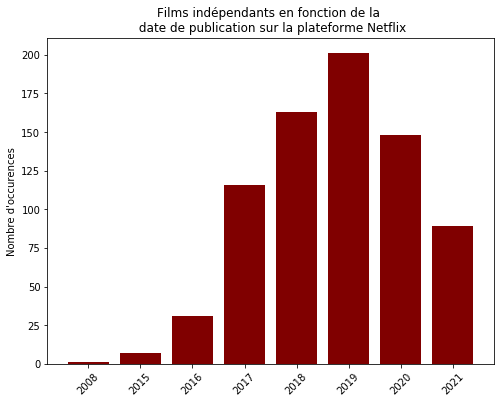

There are 482 Arts, Entertainment, and Culture on Amazon Prime
Number of Arts, Entertainment, and Culture released as a function of time on Amazon Prime : [('', 477), ('2021', 5)]
There are 1263 Documentaries on Netflix
Number of Documentaries released as a function of time on Netflix : [('', 1), ('2012', 1), ('2013', 2), ('2014', 8), ('2015', 18), ('2016', 96), ('2017', 261), ('2018', 231), ('2019', 277), ('2020', 198), ('2021', 170)]


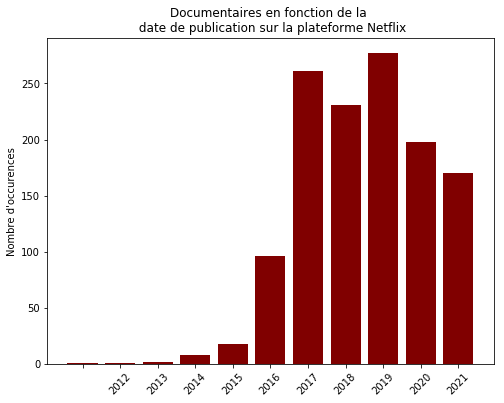

There are 993 Documentaries on Amazon Prime
Number of Documentaries released as a function of time on Amazon Prime : [('', 969), ('2021', 24)]
Number of Independent movies produced as a function of time on Netflix : [(1955, 2), (1967, 1), (1973, 1), (1974, 2)]


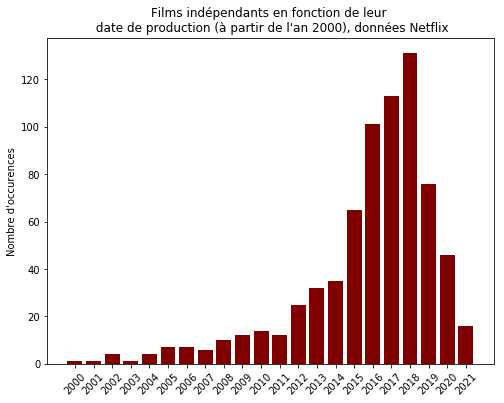

Number of Arts, Entertainment, and Culture produced as a function of time on Amazon Prime : [(1930, 1), (1936, 3), (1937, 4), (1938, 1)]


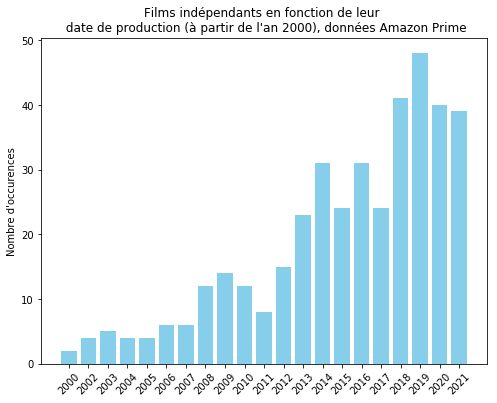

Number of Documentaries produced as a function of time on Netflix : [(1942, 2), (1943, 3), (1944, 2), (1945, 3)]


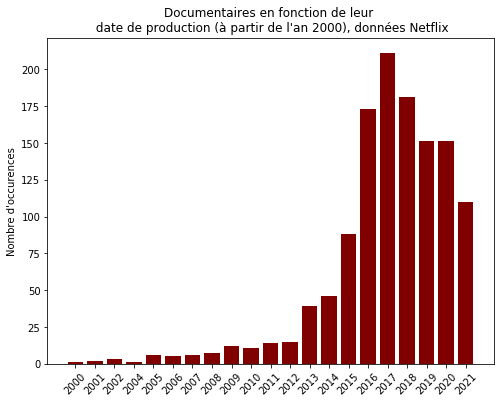

Number of Documentaries produced as a function of time on Amazon Prime : [(1945, 1), (1947, 1), (1966, 1), (1969, 1)]


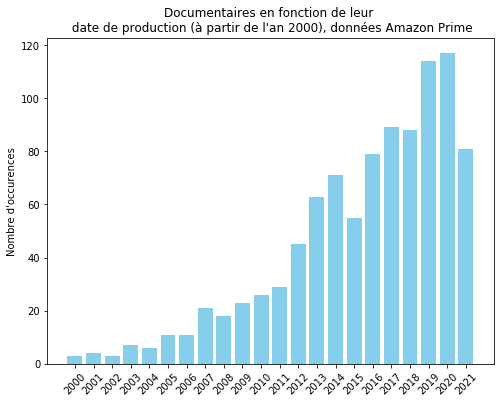

83 directors made 2 Documentaries or more on Netflix


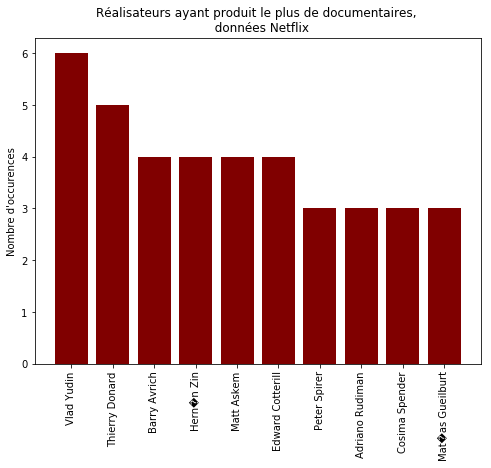

38 directors made 2 Documentaries or more on Amazon Prime


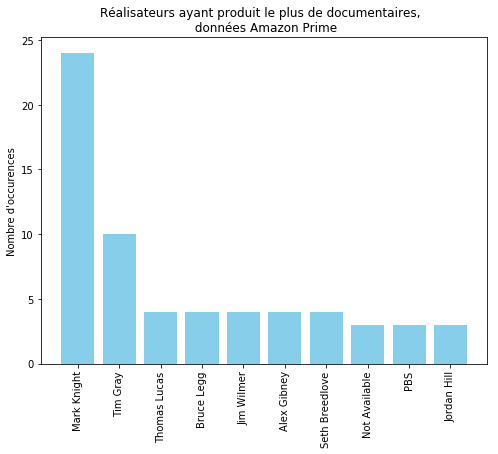

There are  4530 different directors on Netflix
There are  5779 different directors on Amazon Prime


In [2]:
# partie à exécuter sur Jupyter Notebook afin d'utiliser spark

import pyspark
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


sc = SparkContext.getOrCreate()

# import des jeus de données
inputRDDnet = sc.textFile("netflix.csv").map(lambda line: line.split(";"))
inputRDDamazon = sc.textFile("amazon_prime_titles.csv").map(lambda line: line.split(";"))

# Vérification de l'importation correcte des données
#print("Le nombe de ligne du jeu de données Netflix est :",inputRDDnet.count())
#print(inputRDDnet.take(4))

#print("Le nombe de ligne du jeu de données Amazon Prime est :",inputRDDamazon.count())
#print(inputRDDamazon.take(4))

# définition des fonctions
    
def release_year_type(RDD, genre, base):
    short_genre = genre[0:4]
    # filtre les films selon le genre
    selection = RDD.map(lambda x: [x[i] for i in [6,10]]).filter(lambda x: short_genre in x[1]) 
    print("There are", selection.count(),genre,"on",base)
    date = selection.map(lambda x: x[0].split("/")) 
    # décompte en fonction de l'année
    map_reduce = date.map( lambda x: (x[-1],1)).reduceByKey(lambda x,y: (x+y)).sortByKey()
    print("Number of",genre,"released as a function of time on", base,":", map_reduce.collect())
    return np.array(map_reduce.collect()) 

def prod_year_type(RDD, genre, base):
    short_genre = genre[0:4]
    # filtre les films selon le genre
    selection = RDD.map(lambda x: [x[i] for i in [7,10]]).filter(lambda x: short_genre in x[1]) 
    #print("There are", selection.count(),genre,"on",base)
    # décompte en fonction de l'année
    map_reduce = selection.map( lambda x: (int(x[0]),1)).reduceByKey(lambda x,y: (x+y)).sortByKey()
    print("Number of",genre,"produced as a function of time on", base,":", map_reduce.take(4))
    return np.array(map_reduce.collect()) 

def real_type(RDD, genre, seuil, base):
    short_genre = genre[0:4]
    # filtre les films selon le genre
    selection = RDD.map(lambda x: [x[i] for i in [3,10]]).filter(lambda x: short_genre in x[1])
    # décompte du nombre de films réalisés et filtre au seuil
    map_reduce = selection.map( lambda x: (x[0],1)).reduceByKey(lambda x,y: (x+y)).filter(lambda x: x[1]>=seuil)
    tri = map_reduce.sortBy(lambda a: -a[1])
    print(tri.count(), "directors made", seuil, genre, "or more on", base)
    return np.array(tri.collect())

def create_hist(array,titre,rotation,couleur):
    height = list(map(int, array[:, 1]))
    x_pos = np.arange(len(array[:, 0]))
    fig = plt.figure(figsize=(8, 6))
    plt.bar(x_pos,height, color = couleur)
    plt.xticks(x_pos, array[:, 0], 
               fontsize = 10, 
               rotation=rotation)
    plt.title(titre)
    plt.ylabel("Nombre d'occurences")
    plt.show()
    return(fig)

# Genres en fonction de la date de publication sur la plateforme
# Pour les films indépendants
result_inde_release_net = release_year_type(inputRDDnet, "Independent movies", "Netflix")
plot1 = create_hist(result_inde_release_net,
                    "Films indépendants en fonction de la \n date de publication sur la plateforme Netflix",
                    45, 
                    "maroon")
#plot1.savefig("inde_pub_net.png")

result_inde_release_amazon = release_year_type(inputRDDamazon, "Arts, Entertainment, and Culture", "Amazon Prime")
#create_hist(result_inde_amazon)

# Pour les documentaires et docuséries
result_docu_release_net = release_year_type(inputRDDnet, "Documentaries", "Netflix")
plot2 = create_hist(result_docu_release_net,
                    "Documentaires en fonction de la \n date de publication sur la plateforme Netflix",
                    45, 
                    "maroon")
#plot2.savefig("docu_pub_net.png")

result_docu_release_amazon = release_year_type(inputRDDamazon, "Documentaries", "Amazon Prime")
#create_hist(result_docu_release_amazon)

###

# Genres en fonction de leur date de production
# Pour les films indépendants
result_inde_prod_net = prod_year_type(inputRDDnet, "Independent movies", "Netflix")
result_2000_inde_prod_net = result_inde_prod_net[result_inde_prod_net[:,0]>=2000, :]
plot3 = create_hist(result_2000_inde_prod_net,
                    "Films indépendants en fonction de leur \n date de production (à partir de l'an 2000), données Netflix",
                    45, 
                    "maroon")
#plot3.savefig("inde_prod_net.png")

result_inde_prod_amazon = prod_year_type(inputRDDamazon, "Arts, Entertainment, and Culture", "Amazon Prime")
result_2000_inde_prod_amazon = result_inde_prod_amazon[result_inde_prod_amazon[:,0]>=2000, :]
plot4 = create_hist(result_2000_inde_prod_amazon,
                    "Films indépendants en fonction de leur \n date de production (à partir de l'an 2000), données Amazon Prime",
                    45,
                    "skyblue")
#plot4.savefig("inde_prod_am.png")

# Pour les documentaires et docuséries
result_docu_prod_net = prod_year_type(inputRDDnet, "Documentaries", "Netflix")
result_2000_docu_prod_net = result_docu_prod_net[result_docu_prod_net[:,0]>=2000, :]
plot5 = create_hist(result_2000_docu_prod_net,
                    "Documentaires en fonction de leur \n date de production (à partir de l'an 2000), données Netflix",
                    45, 
                    "maroon")
#plot5.savefig("docu_prod_net.png")

result_docu_prod_amazon = prod_year_type(inputRDDamazon, "Documentaries", "Amazon Prime")
result_2000_docu_prod_amazon = result_docu_prod_amazon[result_docu_prod_amazon[:,0]>=2000, :]
plot6 = create_hist(result_2000_docu_prod_amazon,
                    "Documentaires en fonction de leur \n date de production (à partir de l'an 2000), données Amazon Prime",
                    45,
                    "skyblue")
#plot6.savefig("docu_prod_am.png")

##########

# Nombre de réalisateurs qui ont réalisé au moins 2 documentaires
result_real_net = real_type(inputRDDnet,"Documentaries",2, "Netflix")
result_10_real_net = result_real_net[1:11,  :] # sélection des 10 premiers
plot7 = create_hist(result_10_real_net,
                    "Réalisateurs ayant produit le plus de documentaires, \n  données Netflix",
                    90, 
                    "maroon")
#plot7.savefig("real_docu_net.png")

result_real_amazon = real_type(inputRDDamazon,"Documentaries",2, "Amazon Prime")
result_10_real_amazon = result_real_amazon[1:11,  :] 
plot8 = create_hist(result_10_real_amazon,
                    "Réalisateurs ayant produit le plus de documentaires,  \n données Amazon Prime",
                    90,
                    "skyblue")
#plot8.savefig("real_docu_am.png") 

# comparaison au nombre de réalisateurs total
result_real_tot_net = inputRDDnet.map(lambda x: (x[3],1)).reduceByKey(lambda x,y: (x+y))
print("There are ",result_real_tot_net.count(), "different directors on Netflix")
result_real_tot_amazon = inputRDDamazon.map( lambda x: (x[3],1)).reduceByKey(lambda x,y: (x+y))
print("There are ", result_real_tot_amazon.count(), "different directors on Amazon Prime")


sc.stop()

83 directors made 2 Documentaries or more on Netflix


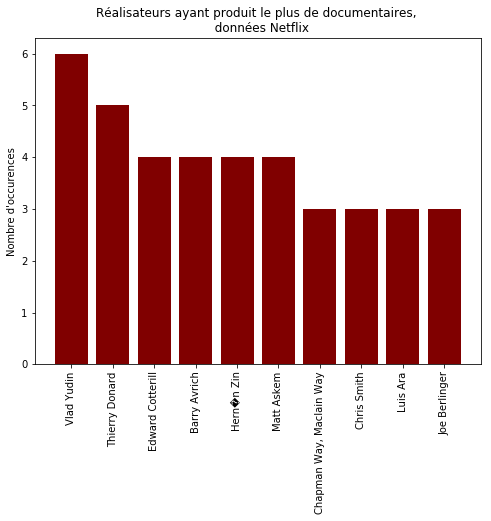

38 directors made 2 Documentaries or more on Amazon Prime


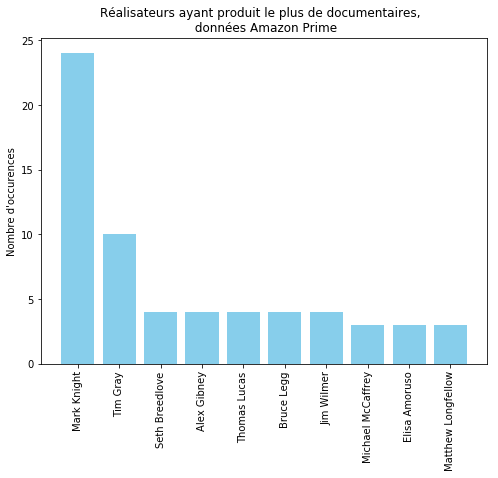